In [3]:
import numpy as np
import george
from george import kernels
import schwimmbad
from dynesty import plotting as dyplot
import dynesty
import time
import pickle
import matplotlib.pyplot as plt
from matplotlib import cm

In [15]:
fitdata=np.load("../notebooks/2d_fitdata_03.npy")
with open ('../grid_metadata/2dgrid_coords.txt', 'rb') as fp:
    coords = pickle.load(fp)
Tstar=fitdata[:,0]
logR_disk=fitdata[:,1]
w2=fitdata[:,2+2]
yerr=np.array([j*0.01 for j in w2])

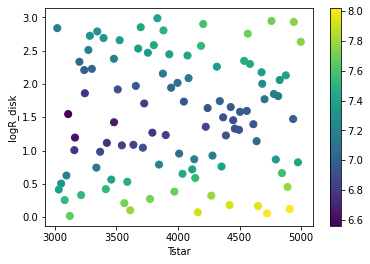

In [16]:
style = dict(cmap='viridis', vmin=np.min(w2), vmax=np.max(w2))
plt.scatter(Tstar,logR_disk, c=w2, s=50, **style)
plt.xlabel("Tstar")
plt.ylabel("logR_disk")
plt.colorbar()
plt.show()

In [17]:
x=np.transpose(coords)
kernel = np.var(w2) * kernels.ExpSquaredKernel(50000**2,ndim=2,axes=0)* kernels.ExpSquaredKernel(0.5**2,ndim=2,axes=1)
gp = george.GP(kernel)
gp.compute(x,yerr)

np.set_printoptions(suppress=True)
print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(w2)))
print(gp.get_parameter_vector())
print(np.sqrt(np.exp(gp.get_parameter_vector())))

Initial ln-likelihood: -844.42
[-2.88626411 21.63955657 -1.38629436]
[    0.23618685 50000.             0.5       ]


In [23]:
ndim = 3

def loglike (p):
    try:        
        gp.set_parameter_vector(p)
        return gp.log_likelihood(w2)
    except:
        return -100000
        

def ptform(u):
    #  [-50,50] [11,30] [-4.6,2.2]
    return [u[0]*100 -50, u[1]*19+11 , u[2]*6.8-4.6 ]


In [24]:
sampler = dynesty.NestedSampler(loglike, ptform, ndim,nlive=1000, pool=schwimmbad.MultiPool())


In [25]:
t0=time.time()
sampler.run_nested()
print(time.time()-t0)
results = sampler.results

iter: 8887 | +1000 | bound: 10 | nc: 1 | ncall: 52351 | eff(%): 18.886 | loglstar:   -inf < 133.722 <    inf | logz: 124.948 +/-  0.137 | dlogz:  0.001 >  1.009                                      

170.20153975486755


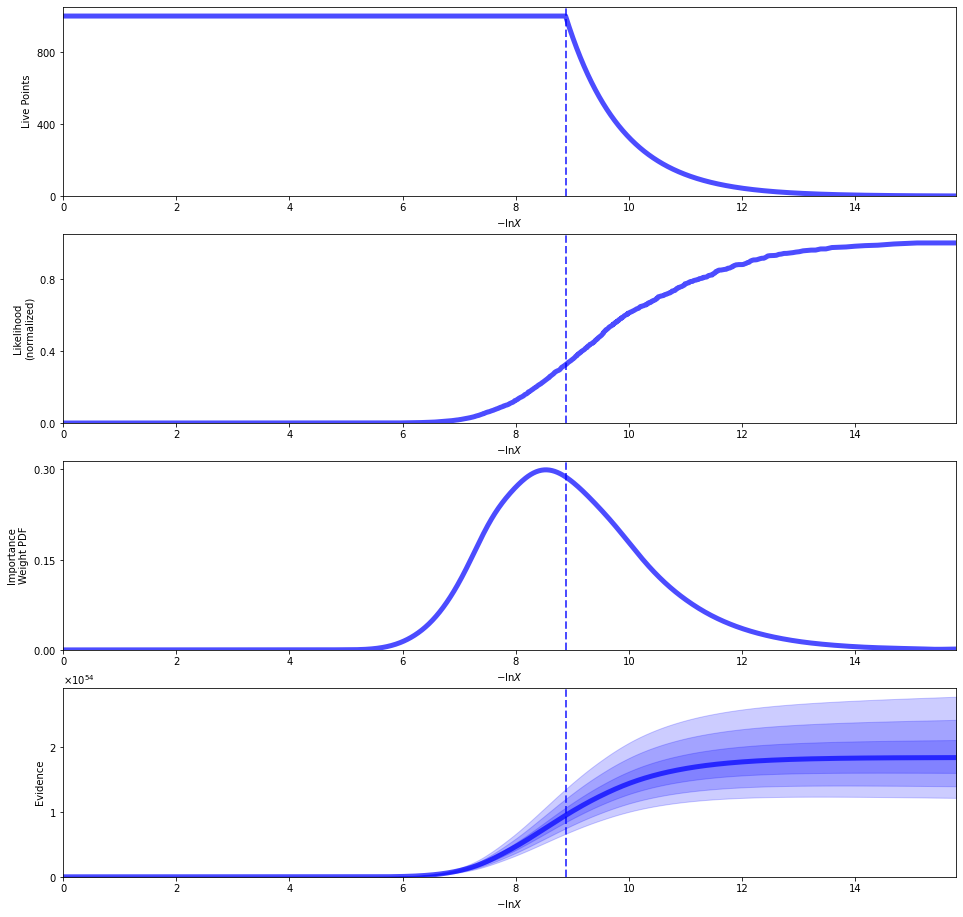

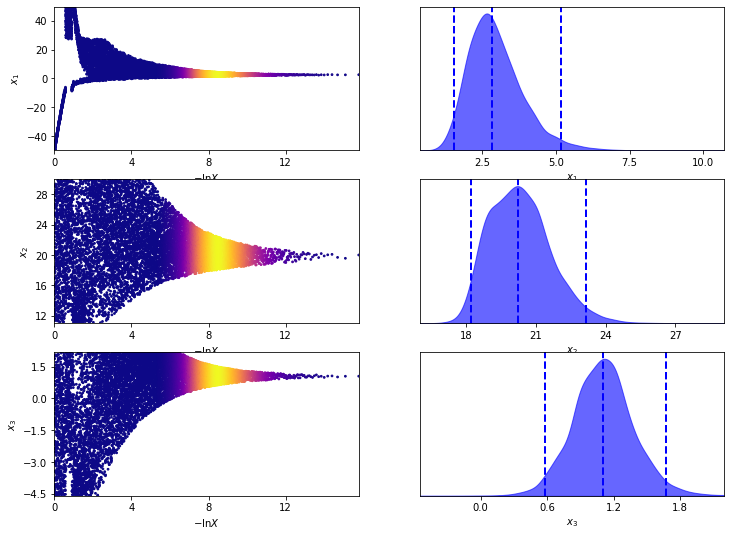

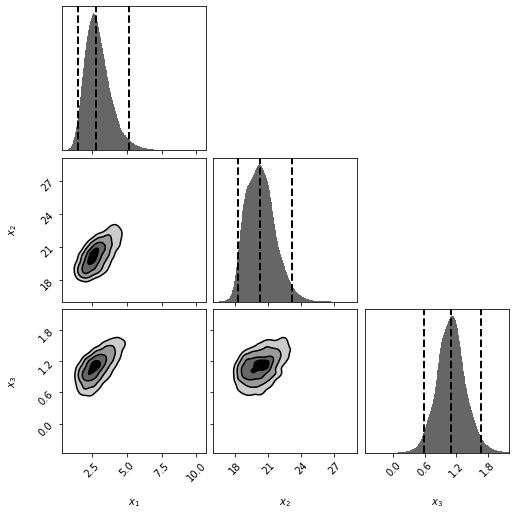

In [26]:
# Plot a summary of the run.
rfig, raxes = dyplot.runplot(results)

# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(results)

# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(results)

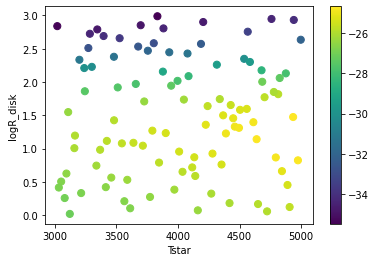

In [4]:
fitdata=np.load("../notebooks/2d_fitdata_03.npy")
with open ('../grid_metadata/2dgrid_coords.txt', 'rb') as fp:
    coords = pickle.load(fp)
Tstar=fitdata[:,0]
logR_disk=fitdata[:,1]
w0=fitdata[:,2+0]
yerr=np.array([j*0.01 for j in w0])

style = dict(cmap='viridis', vmin=np.min(w0), vmax=np.max(w0))
plt.scatter(Tstar,logR_disk, c=w0, s=50, **style)
plt.xlabel("Tstar")
plt.ylabel("logR_disk")
plt.colorbar()
plt.show()

In [6]:
x=np.transpose(coords)
kernel = np.var(w0) * kernels.ExpSquaredKernel(50000**2,ndim=2,axes=0)* kernels.ExpSquaredKernel(0.5**2,ndim=2,axes=1)
gp = george.GP(kernel)
gp.compute(x,yerr)

np.set_printoptions(suppress=True)
print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(w0)))
print(gp.get_parameter_vector())
print(np.sqrt(np.exp(gp.get_parameter_vector())))

Initial ln-likelihood: -225.92
[ 1.62459413 21.63955657 -1.38629436]
[    2.25307752 50000.             0.5       ]


In [11]:
ndim = 3

def loglike (p):
    try:        
        gp.set_parameter_vector(p)
        return gp.log_likelihood(w0)
    except:
        return -100000

def ptform(u):
    #  [-50,50] [11,30] [-4.6,2.2]
    return [u[0]*100 -50, u[1]*19+11 , u[2]*6.8-4.6 ]

In [12]:
sampler = dynesty.NestedSampler(loglike, ptform, ndim,nlive=1000, pool=schwimmbad.MultiPool())

iter: 8778 | +1000 | bound: 10 | nc: 1 | ncall: 50355 | eff(%): 19.418 | loglstar:   -inf <  2.341 <    inf | logz: -6.353 +/-  0.139 | dlogz:  0.001 >  1.009                                        

164.61426901817322


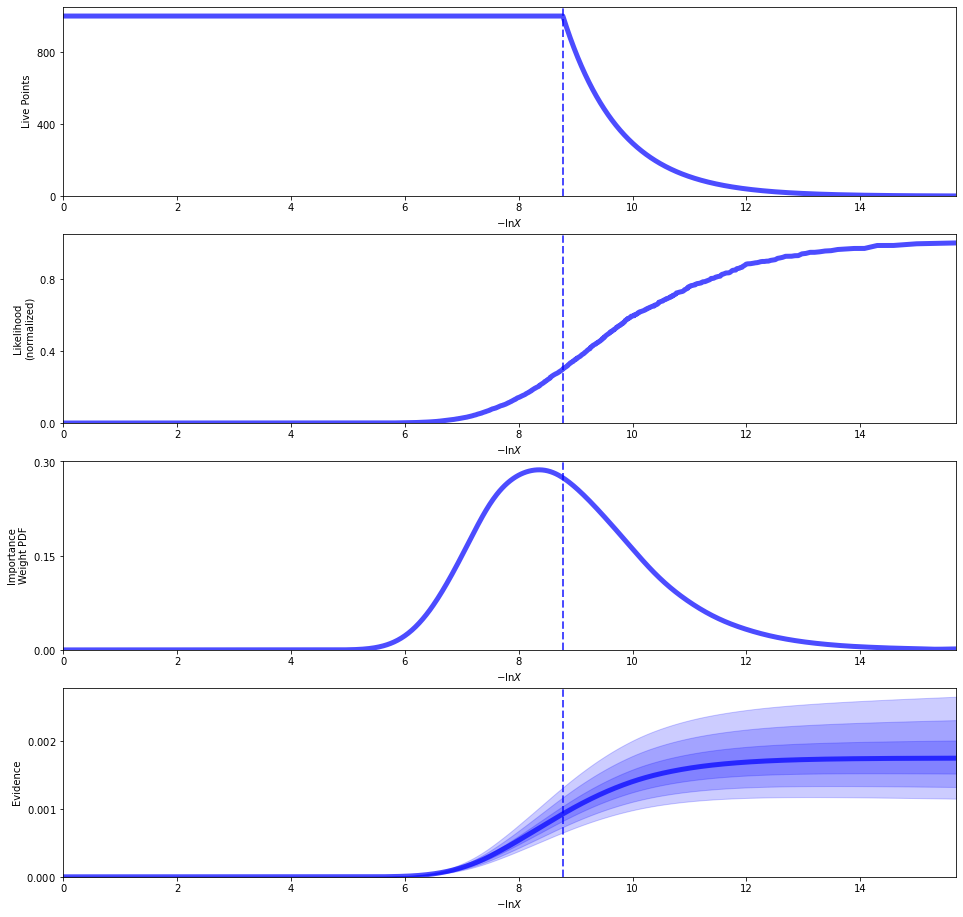

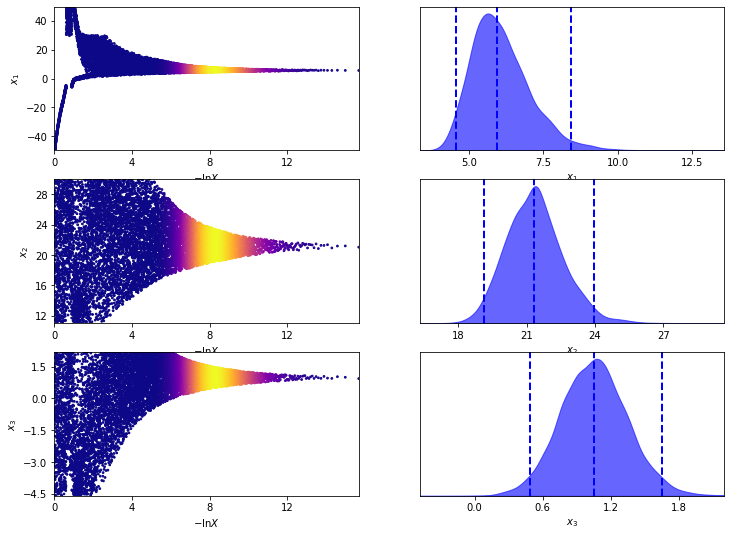

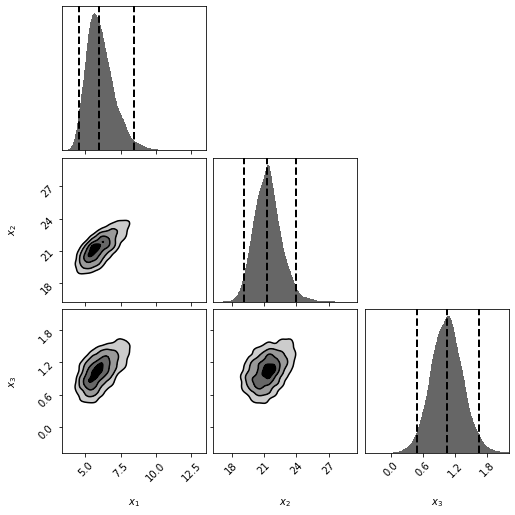

In [13]:
t0=time.time()
sampler.run_nested()
print(time.time()-t0)
results = sampler.results

# Plot a summary of the run.
rfig, raxes = dyplot.runplot(results)

# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(results)

# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(results)